# Assigment III

- Nama : Ines Savitri
- Kode Peserta : PYTN_KS07_017

# BANK

### Tentang Data

Data tersebut terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.


Terdapat empat kumpulan data: 
1) bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat mirip dengan data yang dianalisis di [Moro et al., 2014 ]

2) bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input.

3) bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan lebih sedikit input).

4) bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).

Kumpulan data terkecil disediakan untuk menguji algoritma pembelajaran mesin yang lebih menuntut komputasi (misalnya, SVM).
Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

### Isi Dataset

**Bank Client Data :**


1 - age (numeric)

2 - job : type of job (categorical:'admin.','blucollar','entrepreneur','housemaid','management','retired','self employed','services','student','technician','unemployed','unknown')

3  marital : marital status(categorical:
'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')


**related with the last contact of the current campaign:**

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16, 12]

%matplotlib inline 

import seaborn as sns
sns.set(style = 'white', color_codes = True)

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

import sklearn.linear_model as linear_model

### Download Datasets

In [2]:
df_Bank = pd.read_csv('bank-additional-full.csv', sep=';')

df_Bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df_Bank.shape

(41188, 21)

In [4]:
df_Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df_Bank.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

#### Berdasarkan output di atas, dapat kita ketahui dataset bank-additional-full.csv ini memiliki 41.188 data dan 21 kolom dengan 3 type data yaitu float64, int64 dan object. 

### Cleansing Data

In [6]:
df_Bank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [7]:
df_Bank.isnull().values.any()

False

#### Berdasarkan output di atas, dapat kita ketahui tidak ada nilai missing value pada data

In [8]:
df_Bank.duplicated().any()

True

In [9]:
df_Bank.duplicated().value_counts()

False    41176
True        12
dtype: int64

#### Berdasarkan output di atas, dapat kita ketahui bahwa terdapat 12 duplikasi data dan harus di hapus.

In [10]:
# Menghapus data duplikat
df_Bank.drop_duplicates(inplace=True)

In [11]:
df_Bank.duplicated().any()

False

In [12]:
# Memastikan data duplikat sudah terhapus
df_Bank.duplicated().sum()

0

### Visualisasi Data

Text(0, 0.5, 'Frekuensi')

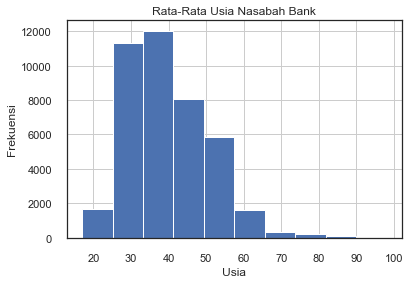

In [13]:
# Rata-Rata Usia Nasabah Bank

df_Bank.age.hist()
plt.title('Rata-Rata Usia Nasabah Bank')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')


#### Berdasarkan output di atas, dapat diketahui bahwa rata-rata klien bank dalam dataset berusia antara 30-50 tahun

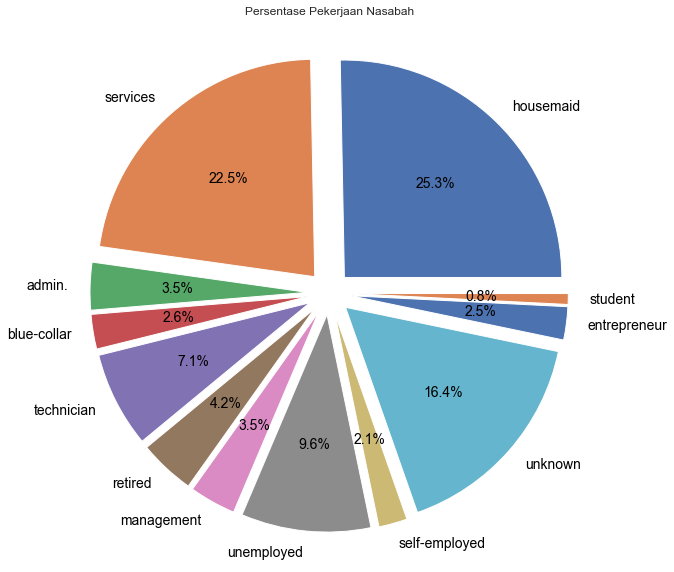

In [14]:
# Persentase pekerjaan Nasabah

lables = df_Bank['job'].unique()
sizes = df_Bank.groupby(['job']).size()
plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.set_facecolor('lightblue')
plt.title('Persentase Pekerjaan Nasabah')
plot = plt.pie(sizes, labels=lables, autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1], textprops={'fontsize':14, 'color':'black'})
plt.show()

In [15]:
job = (df_Bank["job"]).unique()
job

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [16]:
len(job)

12

#### Berdasarkan output di atas, dapat diketahui bahwa pekerjaan nasabah bank paling banyak adalah Ibu Rumah Tangga sebesar 25,3% dan Pelayan sebesar 22.5% 

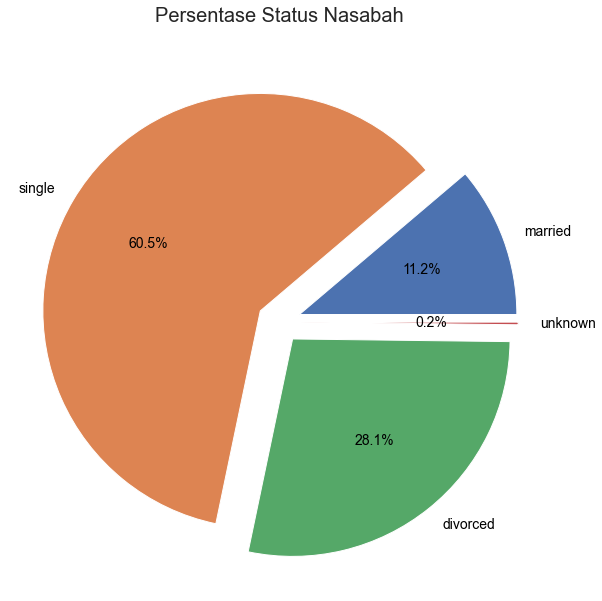

In [17]:
# Persentase Status Nasabah Bank

lables = df_Bank['marital'].unique()
sizes = df_Bank.groupby(['marital']).size()
plt.figure(figsize=(20, 10))
ax = plt.axes()
ax.set_facecolor('lightblue')
plt.title('Persentase Status Nasabah\n', size=20)
plot = plt.pie(sizes, labels=lables, autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1], textprops={'fontsize':14, 'color':'black'})
plt.show()

In [18]:
marital = (df_Bank["marital"]).unique()
marital

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [19]:
len(marital)

4

#### Berdasarkan output di atas, dapat diketahui bahwa Status Nasabah terbanyak adalah Single atau Belum Menikah sebesar 60.5%

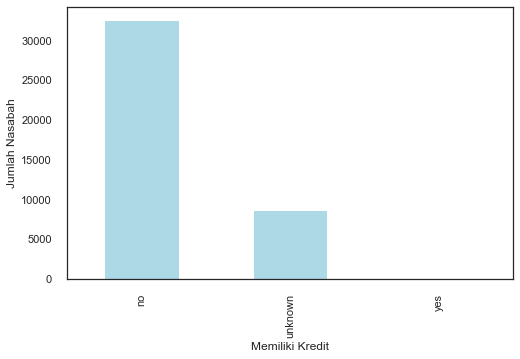

In [20]:
# Persentase Nasabah yang kepemilikian kredit

df_default = df_Bank['default'].value_counts()

df_default.plot(kind='bar', color='lightblue', figsize=(8,5))

plt.xlabel('Memiliki Kredit')
plt.ylabel('Jumlah Nasabah')
plt.ylim(ymin=0)

plt.show()

In [21]:
df_default

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

#### Berdasarkan output di atas, dapat diketahui bahwa jumlah nasabah yang tidak memiliki kredit sebanyak 32.577 orang, yang memiliki kredit sebanyak 3 orang, dan belum diketahui kepemilikannya sebanyak 8.596 orang.

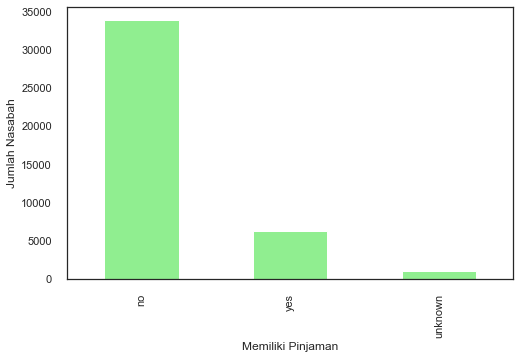

In [22]:
# Persentase Nasabah yang memiliki pinjaman

df_loan = df_Bank['loan'].value_counts()

df_loan.plot(kind='bar', color='lightgreen', figsize=(8,5))

plt.xlabel('Memiliki Pinjaman')
plt.ylabel('Jumlah Nasabah')
plt.ylim(ymin=0)

plt.show()

In [23]:
df_loan

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

#### Berdasarkan output di atas, dapat diketahui bahwa jumlah nasabah yang tidak memiliki pinjaman sebanyak 33.938 orang, yang memiliki pinjaman sebanyak 6.248 orang, dan belum diketahui kepemilikannya sebanyak 990 orang.

### Data Pre-processing

In [24]:
data_bank = df_Bank.copy()

### Split Datasets

In [25]:
# Menghapus kolom yang tidak diperlukan untuk model
data_bank =data_bank.drop(columns=['duration', 'marital', 'day_of_week'])

In [26]:
data_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   education       41176 non-null  object 
 3   default         41176 non-null  object 
 4   housing         41176 non-null  object 
 5   loan            41176 non-null  object 
 6   contact         41176 non-null  object 
 7   month           41176 non-null  object 
 8   campaign        41176 non-null  int64  
 9   pdays           41176 non-null  int64  
 10  previous        41176 non-null  int64  
 11  poutcome        41176 non-null  object 
 12  emp.var.rate    41176 non-null  float64
 13  cons.price.idx  41176 non-null  float64
 14  cons.conf.idx   41176 non-null  float64
 15  euribor3m       41176 non-null  float64
 16  nr.employed     41176 non-null  float64
 17  y               41176 non-null 

In [27]:
# Defining dataset
columns_num = ['age','campaign','pdays','previous','emp.var.rate','cons.price', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_cat = ['job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
columns_features = ['age', 'job', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
columns_bool = ['y']

#### Encoding Data Columns

In [28]:
le = preprocessing.LabelEncoder()

In [29]:
for col in columns_cat:
    data_bank[col] = le.fit_transform(data_bank[col])

In [30]:
data_bank.head()

,age,job,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,3,1,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,3,0,2,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,3,0,0,2,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
for col in columns_bool:
    data_bank[col] = le.fit_transform(data_bank[col])

In [32]:
data_bank.head()

,age,job,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,3,1,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,3,0,2,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,3,0,0,2,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [33]:
data_bank.shape

(41176, 18)

In [34]:
# Scaling data

x = data_bank.drop(['y'], axis=1)
y = pd.DataFrame(data_bank['y'])

In [35]:
# Split dataset 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [36]:
print(x_train.shape)
print(x_test.shape)

(28823, 17)
(12353, 17)


In [37]:
print(y_train.shape)
print(y_test.shape)

(28823, 1)
(12353, 1)


### Definisi Model

### Logistic Regression

In [38]:
model_logreg = LogisticRegression()
model_logreg.fit(x_train, y_train)

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred_lr = model_logreg.predict(x_test)

print('Nilai Akurasi Model Logistic Regresion: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_lr))) 

Nilai Akurasi Model Logistic Regresion: 0.89711


#### Berdasarkan output di atas, dapat diketahui nilai akurasi dari model Logistic Regression sebesar 0.89711 atau sebesar 89%

#### Confusion Matrix

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


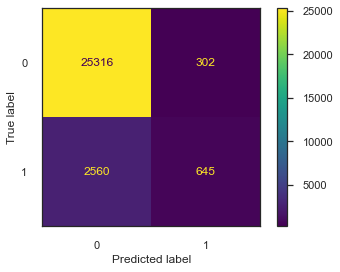

In [40]:
plot_confusion_matrix(model_logreg, x_train, y_train)

In [41]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10919
           1       0.71      0.19      0.30      1434

    accuracy                           0.90     12353
   macro avg       0.81      0.59      0.62     12353
weighted avg       0.88      0.90      0.87     12353



#### Kesimpulan:
Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model Logistic Regression menunjukkan bahwa terdapat 25316 + 645 = 25961 prediksi yang benar, dan 2560 + 302 = 2862 prediksi yang salah.

- 25.316 prediksi negatif yang benar = 25.316 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 2.560 prediksi negatif yang salah = 2.560 pengamatan yang salah sebagai nol atau no
- 302 prediksi positif yang salah = pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 645 prediksi positif yang benar = 645 pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

### K-Nearest Neighbor (KNN)

In [42]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(x_train, y_train)

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred = model_knn.predict(x_test)

print('Nilai Akurasi Model KNN: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_lr))) 

Nilai Akurasi Model KNN: 0.89711


#### Berdasarkan output di atas, dapat diketahui nilai akurasi dari model KNN sebesar 0.89711 atau sebesar 89%

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


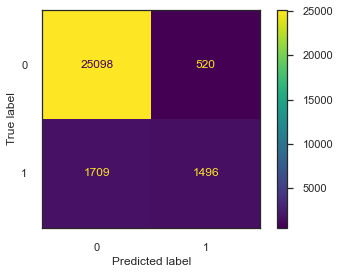

In [45]:
plot_confusion_matrix(model_knn, x_train, y_train)

#### Kesimpulan :

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model KNN menunjukkan bahwa terdapat 25.618 prediksi yang benar dan 3.205 prediksi yang salah.

- 25.618 prediksi negatif yang benar = 25.618 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 3.205 prediksi negatif yang salah = 3.205 pengamatan yang salah sebagai nol atau no
- tidak ada prediksi positif yang salah = pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- tidak ada prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

### SVM (Support Vector Machine)

In [46]:
model_svm = svm.SVC()
model_svm.fit(x_train, y_train)
y_pred = model_svm.predict(x_test)

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
y_pred_svm = model_svm.predict(x_test)

print('Nilai Akurasi Model SVM: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_svm)))  

Nilai Akurasi Model SVM: 0.89549


#### Berdasarkan output di atas, dapat diketahui nilai akurasi dari model SVM sebesar 0.89549 atau sebesar 89%

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


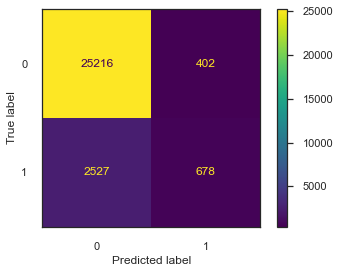

In [49]:
plot_confusion_matrix(model_svm, x_train, y_train)

In [50]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10919
           1       0.66      0.20      0.31      1434

    accuracy                           0.90     12353
   macro avg       0.78      0.59      0.63     12353
weighted avg       0.88      0.90      0.87     12353



#### Kesimpulan :

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model KNN menunjukkan bahwa terdapat 25.216+678 prediksi yang benar dan 2.527+402 prediksi yang salah.

- 25.216 prediksi negatif yang benar = 25.216 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 2.527 prediksi negatif yang salah = 2.527 pengamatan yang salah sebagai nol atau no
- 402 prediksi positif yang salah = 402 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 678 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

### Decision Tree

In [51]:
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [52]:
model_dt = DecisionTreeClassifier(criterion='entropy')
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
y_pred_dt = model_dt.predict(x_test)

print('Nilai Akurasi Model Decision Tree: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_dt)))  

Nilai Akurasi Model Decision Tree: 0.84036


#### Berdasarkan output di atas, dapat diketahui nilai akurasi dari model Decision Tree sebesar 0.84036 atau sebesar 84%

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


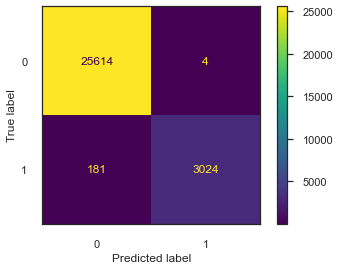

In [54]:
plot_confusion_matrix(model_dt, x_train, y_train)

In [55]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10919
           1       0.33      0.35      0.34      1434

    accuracy                           0.84     12353
   macro avg       0.62      0.63      0.62     12353
weighted avg       0.85      0.84      0.84     12353



#### Kesimpulan:

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model SVM menunjukkan bahwa terdapat 25.614 + 3.024 prediksi yang benar dan 181 + 4 prediksi yang salah. atau

- 25.614 prediksi negatif yang benar = 25.614 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 181 prediksi negatif yang salah = 181 pengamatan yang salah sebagai nol atau no
- 4 prediksi positif yang salah = 4 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 3.024 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

### Random Forest

In [57]:
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(x_train, y_train)

C:\Users\PF3KK\AppData\Local\Temp\ipykernel_46540\3130072775.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestClassifier()

In [58]:
y_pred_rf = model_rf.predict(x_test)

print('Nilai Akurasi Model Random Forest: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf)))  

Nilai Akurasi Model Random Forest: 0.88877


#### Berdasarkan output di atas, dapat diketahui nilai akurasi dari model Random Forest sebesar 0.88877 atau sebesar 88%

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


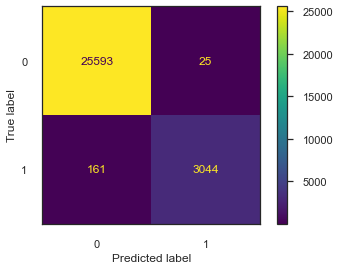

In [59]:
plot_confusion_matrix(model_rf, x_train, y_train)

In [60]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     10919
           1       0.54      0.28      0.37      1434

    accuracy                           0.89     12353
   macro avg       0.73      0.63      0.65     12353
weighted avg       0.87      0.89      0.87     12353



#### Kesimpulan:

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model Random Forest menunjukkan bahwa terdapat 25.588 + 3.049 prediksi yang benar dan 156 + 30 prediksi yang salah. atau

- 25.588 prediksi negatif yang benar = 25.588 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
- 156 prediksi negatif yang salah = 156 pengamatan yang salah sebagai nol atau no
- 30 prediksi positif yang salah = 30 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
- 3.049 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

### Naive Bayes

In [61]:
model_gnb = GaussianNB()
model_gnb.fit(x_train, y_train)

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [62]:
y_pred_gnb = model_gnb.predict(x_test)

print('Nilai Akurasi Model Naive Bayes: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_gnb)))

Nilai Akurasi Model Naive Bayes: 0.83688


#### Berdasarkan output di atas, dapat diketahui nilai akurasi dari model Naive Bayes sebesar 0.83688 atau sebesar 83%

C:\Users\PF3KK\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


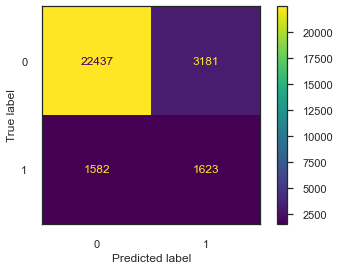

In [63]:
plot_confusion_matrix(model_gnb, x_train, y_train)

In [64]:
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     10919
           1       0.36      0.52      0.43      1434

    accuracy                           0.84     12353
   macro avg       0.65      0.70      0.67     12353
weighted avg       0.87      0.84      0.85     12353



#### Kesimpulan :

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model Naive Bayes menunjukkan bahwa terdapat 22.437 + 1.623 prediksi yang benar dan 1.582 + 3.181 prediksi yang salah

22.437 prediksi negatif yang benar = 22.437 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
1.582 prediksi negatif yang salah = 1.582 pengamatan yang salah sebagai nol atau no
3.181 prediksi positif yang salah = 3.181 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
1.623 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

### Perbandingan 6 Algoritma

In [65]:
print('Nilai Akurasi Logistic Regresion: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_lr)))
print('Nilai Akurasi Model KNN: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_lr))) 
print('Nilai Akurasi Model SVM: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_svm)))
print('Nilai Akurasi Model Decision Tree: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_dt)))  
print('Nilai Akurasi Model Random Forest: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf)))  
print('Nilai Akurasi Model Naive Bayes: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_gnb)))

Nilai Akurasi Logistic Regresion: 0.89711
Nilai Akurasi Model KNN: 0.89711
Nilai Akurasi Model SVM: 0.89549
Nilai Akurasi Model Decision Tree: 0.84036
Nilai Akurasi Model Random Forest: 0.88877
Nilai Akurasi Model Naive Bayes: 0.83688
